### Just a little demonstration of just singular value decomposition(svd) to use a components of the image matrix to capture the majority of the visual information of a photo. In this case the photo being me :)

In [5]:
#Import the packages 

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import save_img 
from keras.preprocessing.image import img_to_array 
import matplotlib.pyplot as plt
import scipy.linalg as sp
import numpy as np

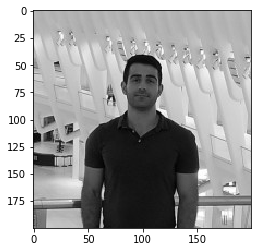

In [6]:
#Load the image in and display it. 

img = load_img('ThomasRad.jpg', grayscale=True) 
imgplot = plt.imshow(img) # convert image to a numpy array 
plt.imshow(img, cmap='gray')

In [7]:
#Write a function to determine the rank of the image which we have converted into a matrix. 

def rank_of_image(image):
    img_array = img_to_array(image) 
    img_matrix = img_array[:,:,0]
    Rank = np.linalg.matrix_rank(img_matrix)
    return Rank

In [8]:
#Try our function on the image and see result. 

rank_of_image(img)

195

In [10]:
#Now we are get the components of the SVD matrix for the image matrix. 

img_array = img_to_array(img) 
img_matrix = img_array[:,:,0]
u, s, v = np.linalg.svd(img_matrix) 

In [13]:
# Compute Variance explained by each singular vector

var_explained = np.round(s**2/np.sum(s**2), decimals=8)
var_explained

array([9.0235144e-01, 5.7444420e-02, 9.6744699e-03, 6.4841802e-03,
       4.3691001e-03, 2.6062201e-03, 2.2618801e-03, 2.1378000e-03,
       1.4353900e-03, 1.0701000e-03, 8.8870001e-04, 8.1288000e-04,
       7.8995997e-04, 6.5834000e-04, 5.8448000e-04, 4.3583999e-04,
       4.0233001e-04, 3.6044000e-04, 3.4887000e-04, 3.1212001e-04,
       2.8112001e-04, 2.4433999e-04, 2.3739001e-04, 2.1195000e-04,
       1.9280000e-04, 1.7748000e-04, 1.7073999e-04, 1.5629000e-04,
       1.4362999e-04, 1.3296001e-04, 1.2447999e-04, 1.1704000e-04,
       1.1441000e-04, 1.0602000e-04, 9.6639997e-05, 9.4269999e-05,
       9.1100002e-05, 8.2890001e-05, 7.8390003e-05, 7.7880002e-05,
       7.5210002e-05, 6.8709996e-05, 6.4690001e-05, 6.2489999e-05,
       5.8210000e-05, 5.6630000e-05, 5.3500000e-05, 4.9779999e-05,
       4.6360001e-05, 4.5720000e-05, 4.1719999e-05, 4.1030002e-05,
       3.8679998e-05, 3.7340000e-05, 3.7210000e-05, 3.3960001e-05,
       3.3529999e-05, 3.1690000e-05, 3.1370000e-05, 3.0620002e

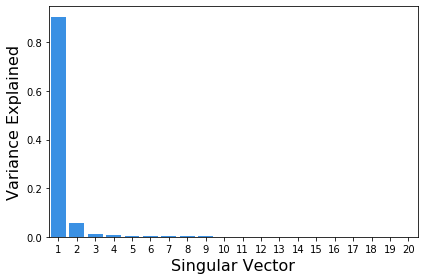

In [14]:
#Lets visually display the explained variance of the image matrix by the number of singualr components used. 

import seaborn as sns
sns.barplot(x=list(range(1,21)),
            y=var_explained[0:20], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd_scree_plot.png',dpi=150, figsize=(8,6))

#### Create a simple function to plot the picture using a specified number of singular components of the vector and see the resulting picture. 

In [16]:
# So here we will just create a simple function that will break the image into an image matrix, get its singular components 
# and based on the number of components we wish to use reconstruct the image and display it using that many componets. 

def get_approximation(image,k):
    img_array = img_to_array(image) 
    img_matrix = img_array[:,:,0]
    u, s, v = np.linalg.svd(img_matrix) 
    new_image = np.matrix(u[:, :k]) * np.diag(s[:k]) * np.matrix(v[:k,:])
    return plt.imshow(new_image, cmap='gray')

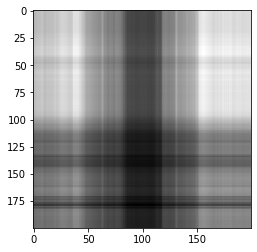

In [18]:
#Lets play around and see what happens with just one component. We see just basic structure of light and dark regions. 

get_approximation(img,1)

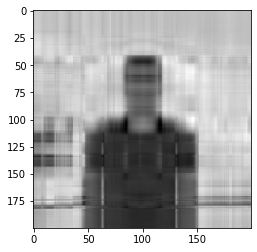

In [19]:
#With just 5 components we can already see that its a picture of a man standing somewhere. Not bad. 

get_approximation(img,5)

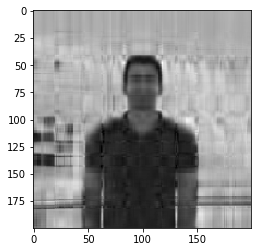

In [20]:
#With 10 we are getting better resolution of myself. 

get_approximation(img,10)

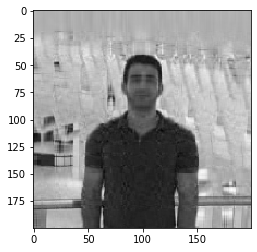

In [25]:
# 25 better resolution get pretty good content of of the surrounds and roughly of how i look but still a bit fuzzy. 

get_approximation(img,25)

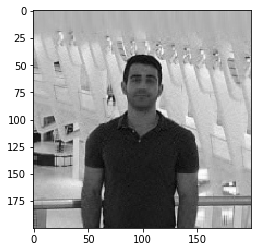

In [22]:
# At this point the picture is clear. And weve only used 1/4th of the components. 
get_approximation(img,50)

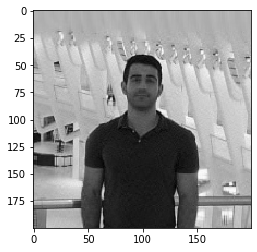

In [24]:
#just one last one to see the more we add the finner details we are gettings. So this is a good way for image compression by not
#needing to use all the information in an image to actually display the contents of a photo. 

get_approximation(img,60)

### And that ends this little project. 